In [28]:
import pandas as pd

# Load the Excel file to explore its structure
file_path = 'internship.xlsx'
excel_data = pd.ExcelFile(file_path)

# Extract sheet names to understand dataset structure
sheet_names = excel_data.sheet_names
sheet_names


['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [30]:
user_details = excel_data.parse('UserDetails.csv')
cooking_sessions = excel_data.parse('CookingSessions.csv')
order_details = excel_data.parse('OrderDetails.csv')

In [31]:
#chcecking null values
print(user_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


In [32]:
print(cooking_sessions.isnull().sum())

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64


In [33]:
# checking null values
print(order_details.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [34]:
# removing null values
order_details.dropna(inplace=True)

In [36]:
# Convert data types
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])  # Convert dates to datetime


In [37]:
# Detect outliers (using z-score)
from scipy.stats import zscore
user_details['z_age'] = zscore(user_details['Age'])
user_details = user_details[user_details['z_age'].abs() < 3]  # Keep only rows with z-score < 3


In [43]:
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')
merged_data = pd.merge(merged_data, order_details, on='User ID', how='inner')

# Save preprocessed data
merged_data.to_csv('Data.csv', index=False)

print("Data preprocessing completed and saved as 'Data.csv'.")

Data preprocessing completed and saved as 'Data.csv'.


In [44]:
df=pd.read_csv('Data.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User ID            32 non-null     object 
 1   User Name          32 non-null     object 
 2   Age                32 non-null     int64  
 3   Location           32 non-null     object 
 4   Registration Date  32 non-null     object 
 5   Phone              32 non-null     object 
 6   Email              32 non-null     object 
 7   Favorite Meal      32 non-null     object 
 8   Total Orders       32 non-null     int64  
 9   z_age              32 non-null     float64
 10  Session ID_x       32 non-null     object 
 11  Dish Name_x        32 non-null     object 
 12  Meal Type_x        32 non-null     object 
 13  Session Start      32 non-null     object 
 14  Session End        32 non-null     object 
 15  Duration (mins)    32 non-null     int64  
 16  Session Rating     32 non-nu

In [46]:
df.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
z_age                0
Session ID_x         0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
Session ID_y         0
dtype: int64

In [50]:
# Group data by UserID and calculate counts
sessions_per_user = df.groupby('User ID')['Session ID_x'].count().rename('TotalSessions')
orders_per_user = df.groupby('User ID')['Order ID'].count().rename('TotalOrders')

# Merge the aggregated data
user_activity = pd.concat([sessions_per_user, orders_per_user], axis=1)

# Correlation analysis
correlation = user_activity.corr()
print("Correlation between Cooking Sessions and Orders:")
print(correlation)


Correlation between Cooking Sessions and Orders:
               TotalSessions  TotalOrders
TotalSessions            1.0          1.0
TotalOrders              1.0          1.0


In [53]:
# Calculate dish frequency
popular_dishes = df['Dish Name_y'].value_counts()

# Display top 10 popular dishes
print("Top 10 Popular Dishes:")
print(popular_dishes.head(10))


Top 10 Popular Dishes:
Dish Name_y
Spaghetti          9
Caesar Salad       7
Pancakes           6
Grilled Chicken    6
Oatmeal            3
Veggie Burger      1
Name: count, dtype: int64


In [54]:
# Average sessions and orders by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

demographic_analysis = df.groupby('AgeGroup').agg({'Session ID_x': 'count', 'Order ID': 'count'}).rename(
    columns={'Session ID_x': 'TotalSessions', 'Order ID': 'TotalOrders'}
)

print("Demographic Analysis by Age Group:")
print(demographic_analysis)


Demographic Analysis by Age Group:
          TotalSessions  TotalOrders
AgeGroup                            
0-20                  0            0
21-30                18           18
31-40                11           11
41-50                 3            3
51-60                 0            0
60+                   0            0


C:\Users\CHINNU\AppData\Local\Temp\ipykernel_12260\3342591555.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_analysis = df.groupby('AgeGroup').agg({'Session ID_x': 'count', 'Order ID': 'count'}).rename(


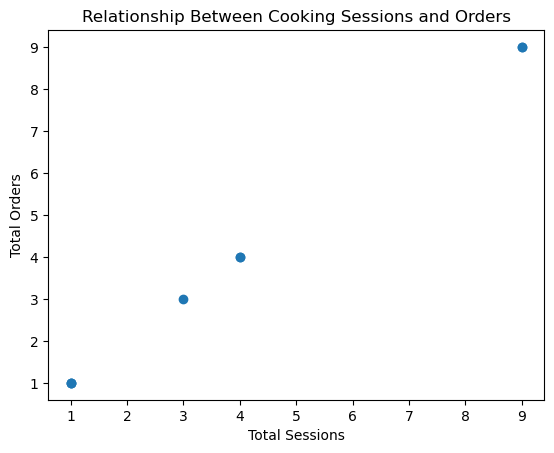

In [56]:
import matplotlib.pyplot as plt
# relationship between cooking sessions and orders
plt.scatter(user_activity['TotalSessions'], user_activity['TotalOrders'])
plt.title("Relationship Between Cooking Sessions and Orders")
plt.xlabel("Total Sessions")
plt.ylabel("Total Orders")
plt.show()


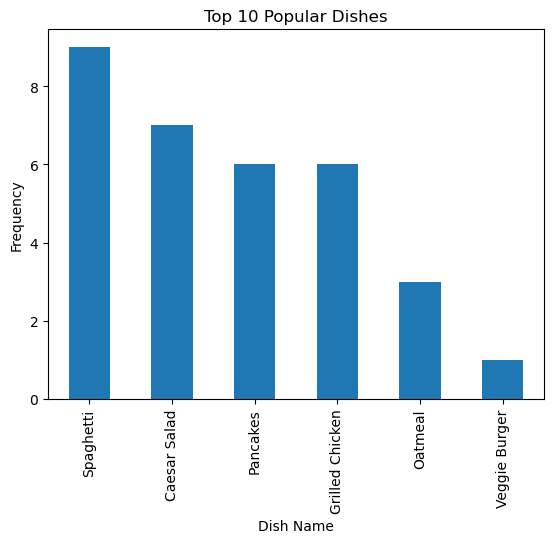

In [57]:
# popular dishes
popular_dishes.head(10).plot(kind='bar', title="Top 10 Popular Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Frequency")
plt.show()


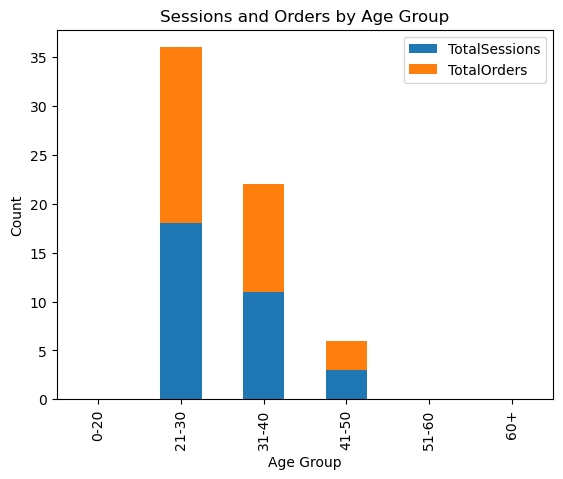

In [58]:
demographic_analysis.plot(kind='bar', stacked=True, title="Sessions and Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()